<h1> <right> SENTENCE CORRECTION USING RNN </right> <h1>

<h3> business overview </h3> <br>
we need to build a model that changes the corrupted text into  the normal stanard distribution of english text. Here the input text 
will be randomly corrupted sentences and our model need to align it in a proper manner that makes a meaning using model

<h3> Research paper </h3><br>
<a>https://cs224d.stanford.edu/reports/Lewis.pdf</a>

<h3> data preparation </h3> <br>
In the research paper they took the dataset from the following link <a>https://www.comp.nus.edu.sg/~nlp/corpora.html</a>
and the dataset consists of courpted text in the first line, stanard text in the second line and chinese in the third line <br>
so ith line corupted text<br>
i+1th line stanard text <br>
i+2th line chinese text <br>
we need only i and i+1 th line for our model<br>
so i downloded the corpus from the same site

In [1]:
%%time
# loading necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import re

Wall time: 1.91 s


In [2]:
file_name='en2cn-2k.en2nen2cn'
file = open(file_name,'r',encoding="utf8")
lines = []
for line in file.readlines():
    lines.append(line)

In [3]:
corupted_text = []
normal_text = []
for i in range(0,len(lines),3):
    corupted_text.append(lines[i])
    normal_text.append(lines[i+1])
    

In [4]:
dataframe = pd.DataFrame({"corupted_text":corupted_text,"normal_text":normal_text})

In [5]:
dataframe.head(4)

,corupted_text,normal_text
0,"U wan me to ""chop"" seat 4 u nt?\n",Do you want me to reserve seat for you or not?\n
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?\n,I'm Thai. What do you do?\n


In [6]:
def preprocess(text):
    text = text.replace("\\n","")
    text = text.strip()
    return text

In [7]:
%%time
dataframe["corupted_text"] = dataframe["corupted_text"].apply(preprocess)
dataframe["normal_text"] = dataframe["normal_text"].apply(preprocess)

Wall time: 3.23 ms


In [8]:
dataframe.head(5)

,corupted_text,normal_text
0,"U wan me to ""chop"" seat 4 u nt?",Do you want me to reserve seat for you or not?
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?,I'm Thai. What do you do?
4,Hi! How did your week go? Haven heard from you...,Hi! How did your week go? Haven't heard from y...


In [9]:
dataframe.shape

(2000, 2)

In [19]:
dataframe.to_csv("extracted_data.csv")

In [10]:
# this piece of cleans the text
clean = ""
def process(text):
    # lowercase it
    text = text.lower()
    
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    

    string = ""
    for i in text:
        string = string + i+" "
    
    clean = string
    
    # return token list
    return clean

In [11]:
# calcuationg the length of corupted text and normal text
def getLength(text):
    n = len(text)
    return n

In [12]:
%%time
dataframe["corupted_text_length"] = dataframe["corupted_text"].apply(getLength)
dataframe["normal_text_length"] = dataframe["normal_text"].apply(getLength)

Wall time: 3.29 ms


In [13]:
%%time
dataframe["clean_corupted_text"] = dataframe["corupted_text"].apply(process)
dataframe["clean_normal_text"] = dataframe["normal_text"].apply(process)

Wall time: 8.72 s


In [15]:
dataframe.head()

,corupted_text,normal_text,corupted_text_length,normal_text_length,clean_corupted_text,clean_normal_text
0,"U wan me to ""chop"" seat 4 u nt?",Do you want me to reserve seat for you or not?,31,46,u wan chop seat 4 u nt,want reserve seat
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...,67,74,yup u reaching order durian pastry already u c...,yeap reaching ordered durian pastry already co...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...,100,111,become ex oredi mine like 25 horrible n less t...,become expensive already mine like 25 horrible...
3,I'm thai. what do u do?,I'm Thai. What do you do?,23,25,im thai u,im thai
4,Hi! How did your week go? Haven heard from you...,Hi! How did your week go? Haven't heard from y...,80,81,hi week go heard time hows everything,hi week go havent heard time hows everything


<h4> top 10 lengths of corupted_text </h4>

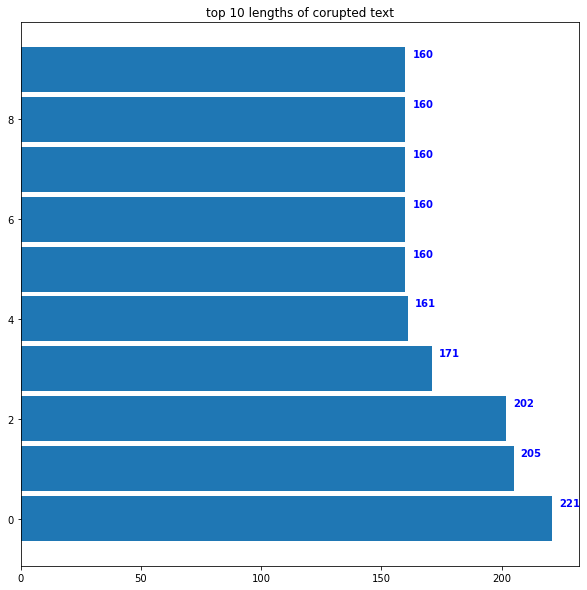

Wall time: 131 ms


In [16]:
%%time
x=[]
for i in range(10):
    x.append(i)
y = list(dataframe["corupted_text_length"].values)
y.sort(reverse=True)
y = y[0:10]
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(x,y,0.9)
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), 
            color = 'blue', fontweight = 'bold')
plt.title("top 10 lengths of corupted text")
print()
plt.show()

the maximum length of the corrupted text is 238 followed by length of 208 and 205

<h4> bottom 10 lengths of corputed_text_length</h4>

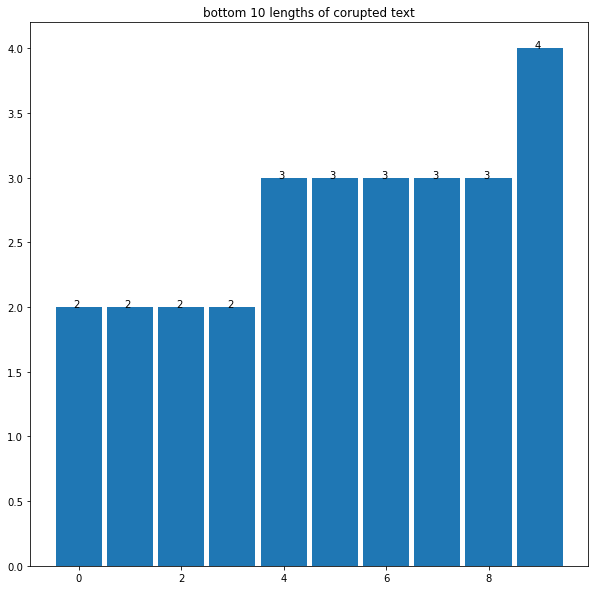

Wall time: 138 ms


In [17]:
%%time
x=[]
for i in range(10):
    x.append(i)
y = list(dataframe["corupted_text_length"].values)
y.sort()
y = y[0:10]
# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x,y,0.9)
for i in range(len(y)):
    plt.annotate(y[i], (-0.1 + i, y[i]))
plt.title("bottom 10 lengths of corupted text")
plt.show()

the minimum length  of the corupted text is 5

<h4> distribution  of corrupted text</h4>

Text(0.5, 1.0, 'distribution  of corrupted text')

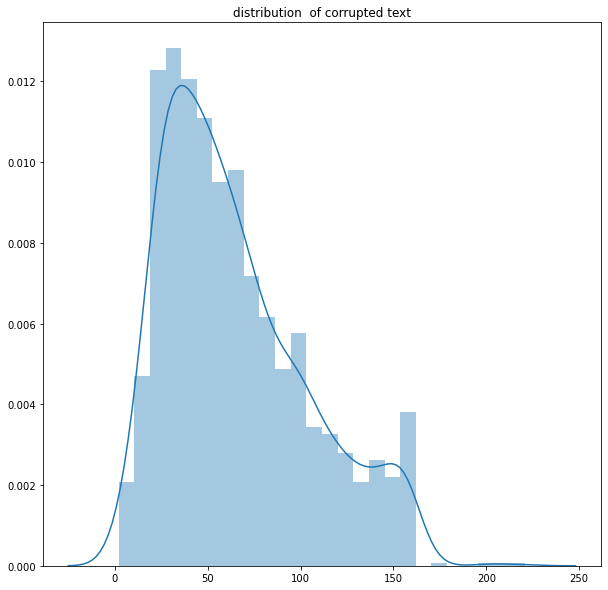

In [18]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(dataframe["corupted_text_length"].values)
plt.title("distribution  of corrupted text")

In [21]:
import numpy as np
l = list(dataframe["corupted_text_length"].values)
for i in range(90,100):
    print(np.percentile(l,i))

125.0
129.0
134.0
138.0
142.0
147.0
151.0
154.0
157.0
159.0


<h4> top 10 lengths of normal_text_length</h4>

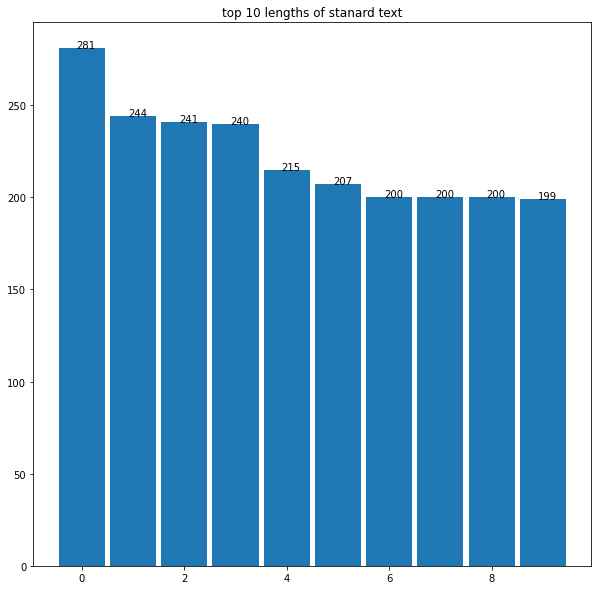

Wall time: 135 ms


In [22]:
%%time
x=[]
for i in range(10):
    x.append(i)
y = list(dataframe["normal_text_length"].values)
y.sort(reverse=True)
y = y[0:10]
# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x,y,0.9)
for i in range(len(y)):
    plt.annotate(y[i], (-0.1 + i, y[i]))
plt.title("top 10 lengths of stanard text")
plt.show()

the maximum length of the stanard text is 284  followed by 247 and  244

<h4> bottom 10 lengths of normal_text_length</h4>

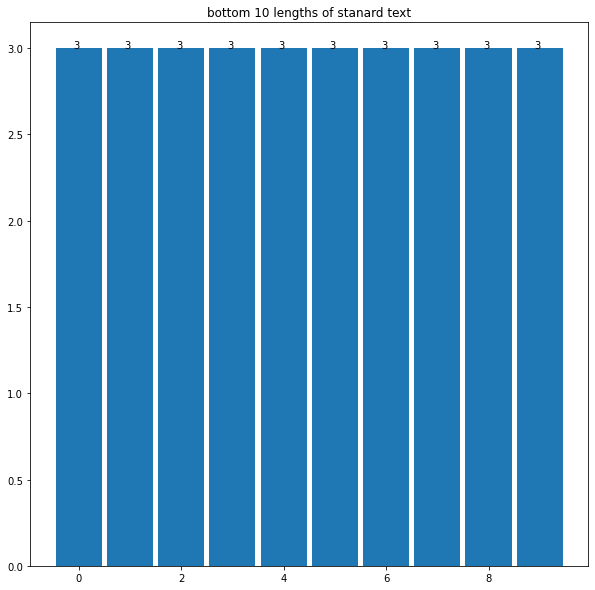

Wall time: 128 ms


In [23]:
%%time
x=[]
for i in range(10):
    x.append(i)
y = list(dataframe["normal_text_length"].values)
y.sort()
y = y[0:10]
# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x,y,0.9)
for i in range(len(y)):
    plt.annotate(y[i], (-0.1 + i, y[i]))
plt.title("bottom 10 lengths of stanard text")
plt.show()

the least length of stanard text is 6

<h4> distriution of length of normal text </h4>

Text(0.5, 1.0, 'distribution of length of normal text')

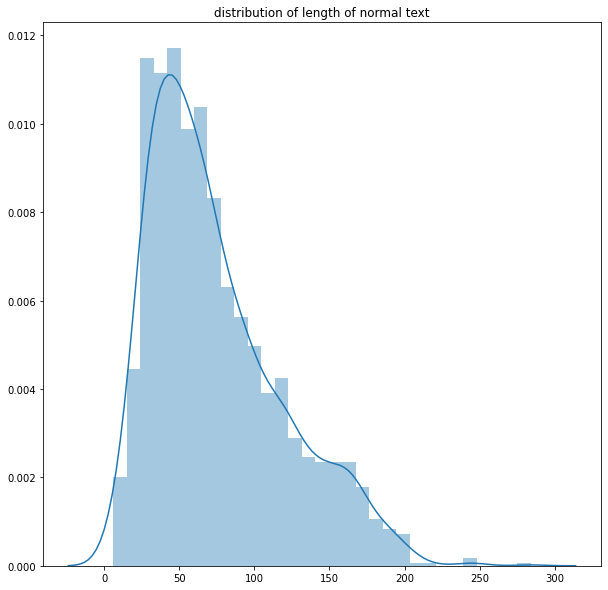

In [59]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(dataframe["normal_text_length"].values)
plt.title("distribution of length of normal text")

In [24]:
import numpy as np
l = list(dataframe["normal_text_length"].values)
for i in range(90,100):
    print(np.percentile(l,i))

140.0
144.0
149.0
154.0
156.0
162.0
165.0
170.0
179.01999999999998
190.01


<h4> top 10 words of corrupted text </h4>

In [71]:
%%time
unique_corrupted_words = {}
corrupted_words = list(dataframe["clean_corupted_text"].values)
for line in corrupted_words:
    temp = line.split(" ")
    for key in temp:
        if key != '':
            
            if key not in unique_corrupted_words:
                unique_corrupted_words[key] = 1
            else:
                unique_corrupted_words[key] +=1


Wall time: 17 ms


In [72]:
x = {k: v for k, v in sorted(unique_corrupted_words.items(), key=lambda item: item[1],reverse=True)}

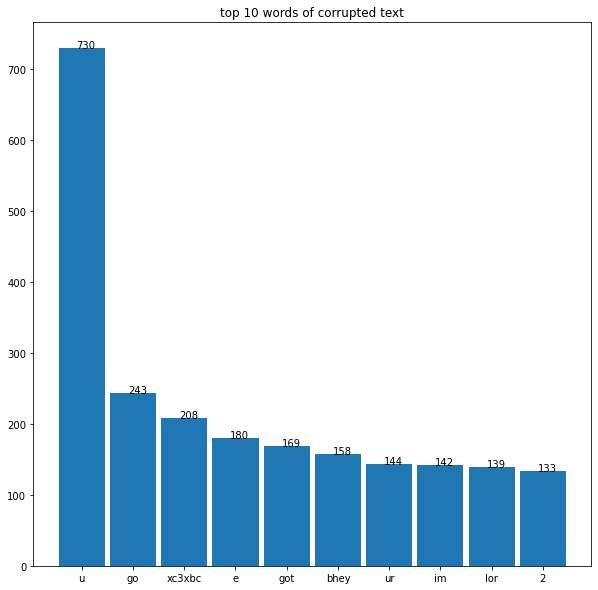

In [73]:
words = list(x.keys())
freq = list(x.values())
x = words[0:10]
y = freq[0:10]
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x,y,0.9)
for i in range(len(y)):
    plt.annotate(y[i], (-0.1 + i, y[i]))
plt.title("top 10 words of corrupted text")
plt.show()

word u is the most occurance word in corrupted text which occurs 730 times followed by go which occurs 243 times

<h4> top 10 words of normal text </h4>

In [74]:
%%time
unique_normal_words = {}
normal_words = list(dataframe["clean_normal_text"].values)
for line in normal_words:
    temp = line.split(" ")
    for key in temp:
        if key != '':
            
            if key not in unique_normal_words:
                unique_normal_words[key] = 1
            else:
                unique_normal_words[key] +=1


Wall time: 12 ms


In [75]:
x = {k: v for k, v in sorted(unique_normal_words.items(), key=lambda item: item[1],reverse=True)}

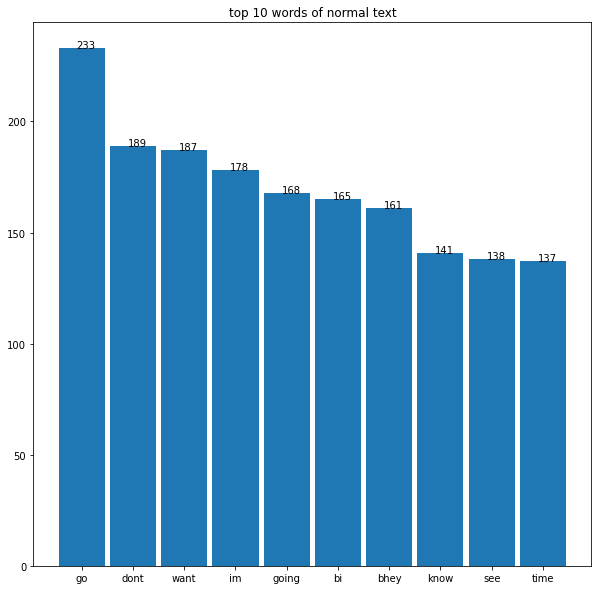

In [76]:
words = list(x.keys())
freq = list(x.values())
x = words[0:10]
y = freq[0:10]
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x,y,0.9)
for i in range(len(y)):
    plt.annotate(y[i], (-0.1 + i, y[i]))
plt.title("top 10 words of normal text")
plt.show()

word go appeared 233 times in the normal text which is the  highest one 

<h4> top 10 letters of corrupted text </h4>

In [88]:
%%time
unique_corrupted_letters = {}
corrupted_words = list(dataframe["clean_corupted_text"].values)
for line in corrupted_words:
    temp = line.split(" ")
    for key in temp:
        if key != '':
            for letter in key:
                if letter not in unique_corrupted_letters:
                    unique_corrupted_letters[letter] = 1
                else:
                    unique_corrupted_letters[letter] +=1


Wall time: 34.9 ms


In [89]:
x = {k: v for k, v in sorted(unique_corrupted_letters.items(), key=lambda item: item[1],reverse=True)}

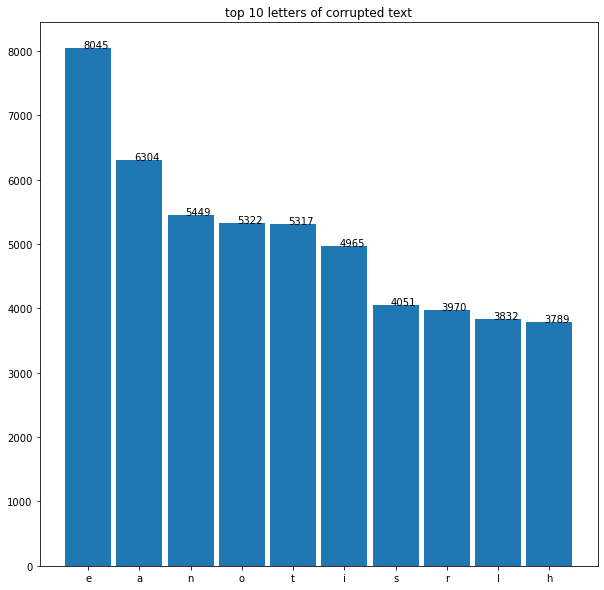

In [90]:
words = list(x.keys())
freq = list(x.values())
x = words[0:10]
y = freq[0:10]
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x,y,0.9)
for i in range(len(y)):
    plt.annotate(y[i], (-0.1 + i, y[i]))
plt.title("top 10 letters of corrupted text")
plt.show()

letter e appeares more times i.e 8045 times in the corrupted text

<h4> top 10 letters of normal text </h4>

In [80]:
%%time
unique_normal_letters = {}
normal_words = list(dataframe["clean_normal_text"].values)
for line in normal_words:
    temp = line.split(" ")
    for key in temp:
        if key != '':
            for letter in key:
                if letter not in unique_normal_letters:
                    unique_normal_letters[letter] = 1
                else:
                    unique_normal_letters[letter] +=1


Wall time: 39 ms


In [81]:
x = {k: v for k, v in sorted(unique_normal_letters.items(), key=lambda item: item[1],reverse=True)}

<Figure size 7200x7200 with 0 Axes>

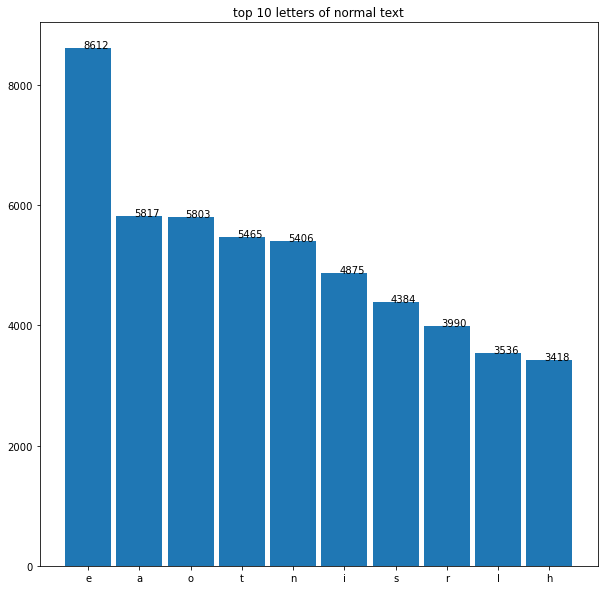

In [82]:
words = list(x.keys())
freq = list(x.values())
x = words[0:10]
y = freq[0:10]
plt.figure(figsize=(100,100))
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x,y,0.9)
for i in range(len(y)):
    plt.annotate(y[i], (-0.1 + i, y[i]))
plt.title("top 10 letters of normal text")
plt.show()

letter e appeared most no times i.e 8612 times in the normal text

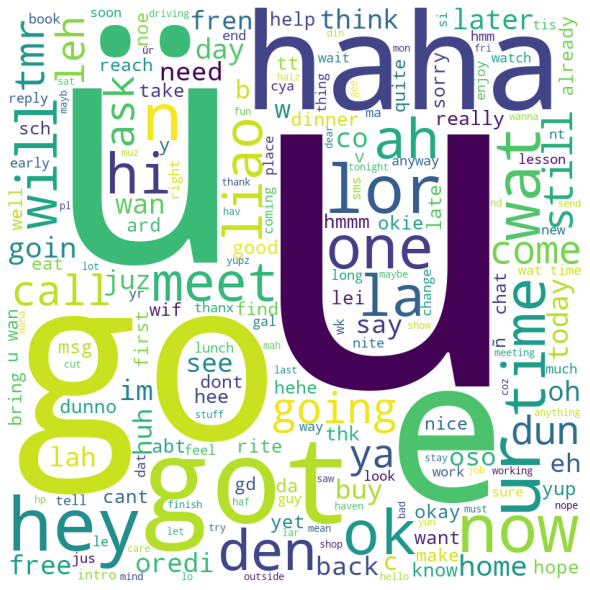

In [26]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in dataframe.corupted_text:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


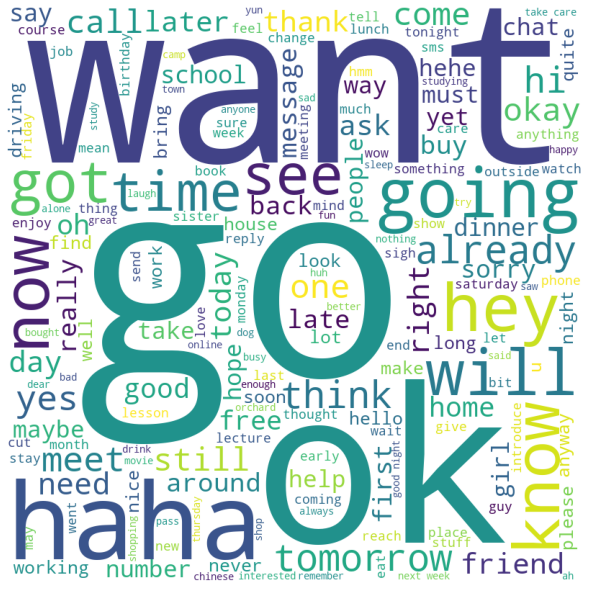

In [27]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in dataframe.normal_text:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
